# Customer Retention Modelling and Strategy for Telecom Domain

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/Telecom_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
pd.set_option('display.max_columns', None)

### Warning Supression

In [7]:
import warnings
warnings.filterwarnings('ignore')

### Dropping irrelevent columns

In [8]:
df = df.drop('customerID' , axis =1)

### Label the churn to 1/0

In [9]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
df['Churn'] = np.where(df['Churn']=='Yes',1,0)

### Separating target and Independent features

In [11]:
X=df.drop(['Churn'], axis =1)
Y = df[['Churn']]

### Churn Rate

In [12]:
Churn_rate = Y.mean()
Churn_rate

Churn    0.26537
dtype: float64

### Split numericals and categorical features

In [13]:
num = X.select_dtypes(include = "number")
char = X.select_dtypes(include = "object")

In [14]:
num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [15]:
num['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [16]:
char.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


### Dropping indicator features from num to build separate Database

In [17]:
ind = num[['SeniorCitizen']]
num.drop('SeniorCitizen', axis =1, inplace = True )

### Outlier analysis of numerical features

In [18]:
num.describe(percentiles = [0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
1%,1.000000,19.200000,19.871000
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


### Capping and Florring Top and Bottom 1% of outliers

In [19]:
def outlier_cap(x):
    x = x.clip(lower = x.quantile(0.01))
    x = x.clip(upper = x.quantile(0.99))
    return(x)

In [20]:
num = num.apply(lambda x : outlier_cap(x))

In [21]:
num.describe(percentiles = [0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.372710,64.749689,2277.243407
std,24.557454,30.062810,2260.002318
min,1.000000,19.200000,19.871000
1%,1.000000,19.200000,19.883180
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


### Missing value analysis

In [22]:
num.isnull().sum()

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

### Feature Selection - numerical features

### Part -1 Remove feature with 0 Variance

In [23]:
from sklearn.feature_selection import VarianceThreshold

varselector = VarianceThreshold(threshold = 0)
varselector.fit_transform(num)
#create new dataframe with selected features
cols = varselector.get_support(indices = True)
num_1 = num.iloc[:, cols]

In [24]:
num_1.iloc[0]

tenure             1.00
MonthlyCharges    29.85
TotalCharges      29.85
Name: 0, dtype: float64

### Part-2 Bi Variate Analysis(Feature Descretization)

In [25]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0.0,2.0,0.0
1,5.0,3.0,5.0
2,1.0,3.0,1.0
3,6.0,2.0,5.0
4,1.0,5.0,1.0


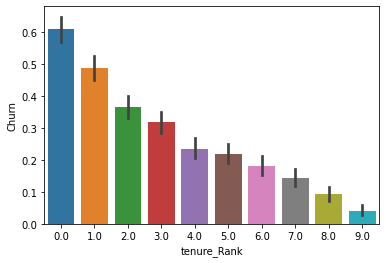

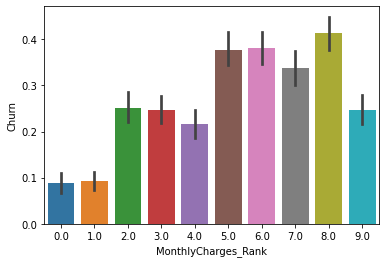

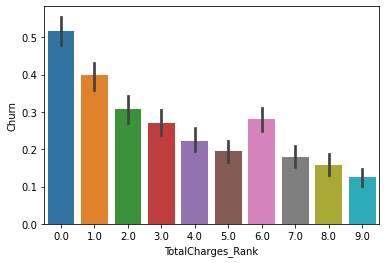

In [26]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="Churn",data=X_bin_combined, estimator=mean )
plt.show()

### All features from num_1 will get selected due to good descrimination 

In [27]:
select_features_df_num=num_1

### Feature Selection - Categorical Features

### Part - 1 Bi Variate Analysis 

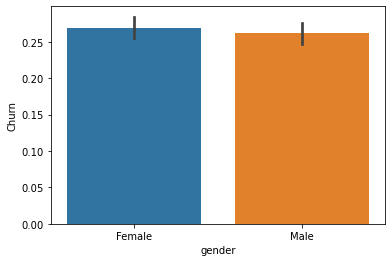

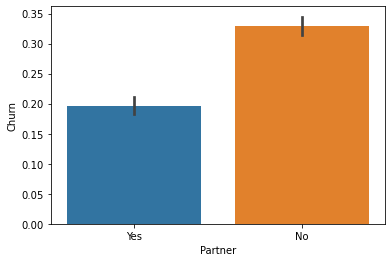

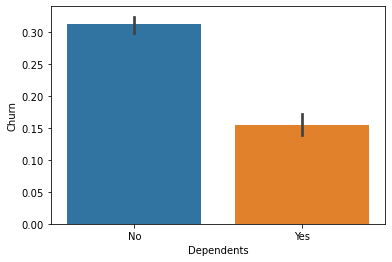

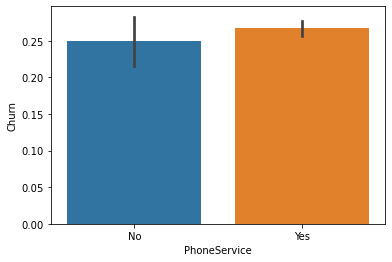

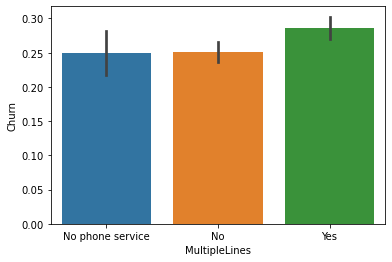

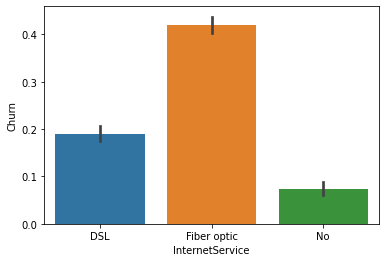

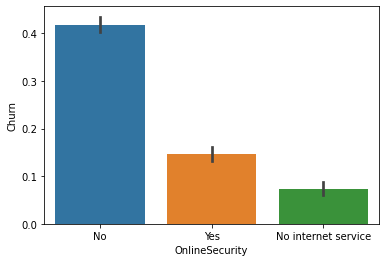

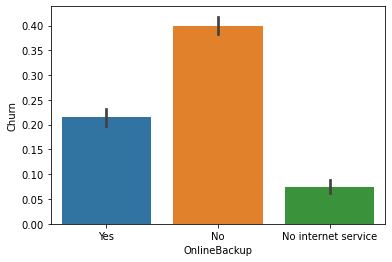

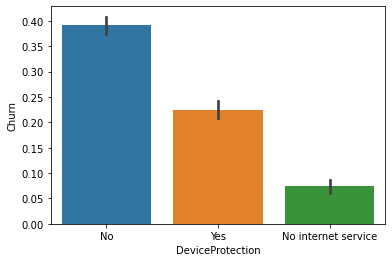

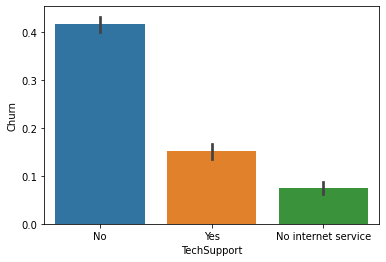

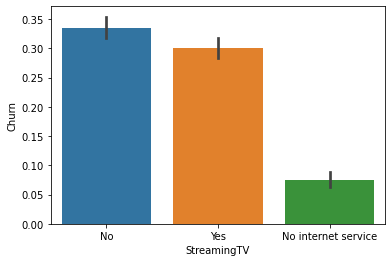

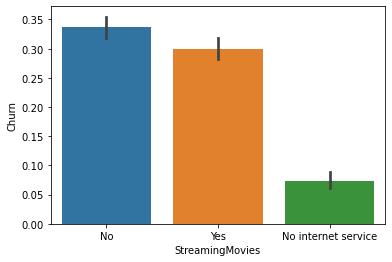

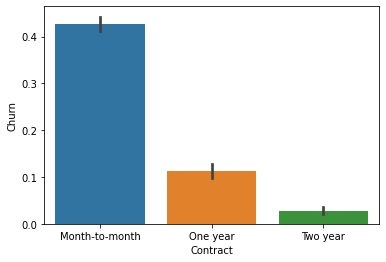

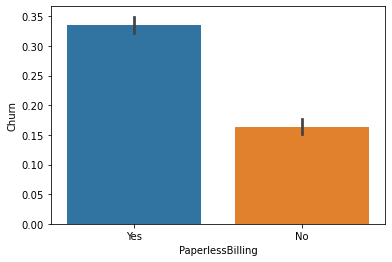

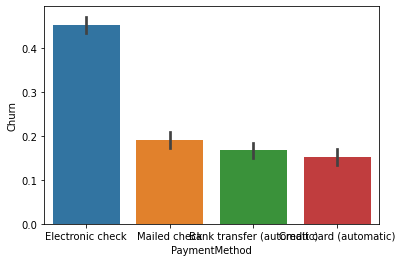

In [28]:
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="Churn",data=X_char_merged, estimator=mean )
plt.show()

In [29]:
char = char.drop(['gender' , 'PhoneService', 'MultipleLines'] , axis =1)

In [30]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(7043, 22)

### PART -2 Select K Best

In [31]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [32]:
select_features_df_char.iloc[0]

Partner_Yes                              1
Dependents_Yes                           0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         1
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingMovies_No internet service      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     1
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           1
PaymentMethod_Mailed check               0
Name: 0, dtype: uint8

### Feature Selection - Numerical Indicator Features

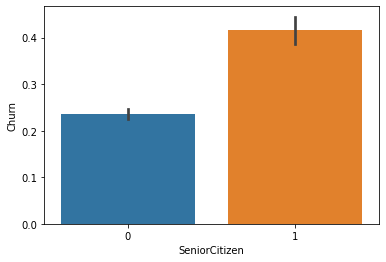

In [33]:
X_ind_merged=pd.concat([Y,ind],axis=1,join='inner')
from numpy import mean
for col in (ind.columns):
    plt.figure()
    sns.barplot(x=col, y="Churn",data=X_ind_merged, estimator=mean )
plt.show()

In [34]:
select_features_df_ind=ind

### Creating the Master Feature Set for Model Development

In [35]:
X_all = pd.concat([select_features_df_num, select_features_df_char, select_features_df_ind],axis =1, join = 'inner')

### Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=99)

In [37]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (4930, 24)
Shape of Testing Data (2113, 24)
Response Rate in Training Data Churn    0.265314
dtype: float64
Response Rate in Testing Data Churn    0.265499
dtype: float64


In [38]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=99)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=99)

In [39]:
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,tenure,-0.063841
1,MonthlyCharges,0.003105
2,TotalCharges,0.000347
3,Partner_Yes,-0.030385
4,Dependents_Yes,-0.247675
5,InternetService_Fiber optic,0.469915
6,InternetService_No,-0.167703
7,OnlineSecurity_No internet service,-0.167703
8,OnlineSecurity_Yes,-0.503425
9,OnlineBackup_No internet service,-0.167703


In [40]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=99)

In [41]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_split': 50}


In [42]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=5,min_samples_split=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=0)

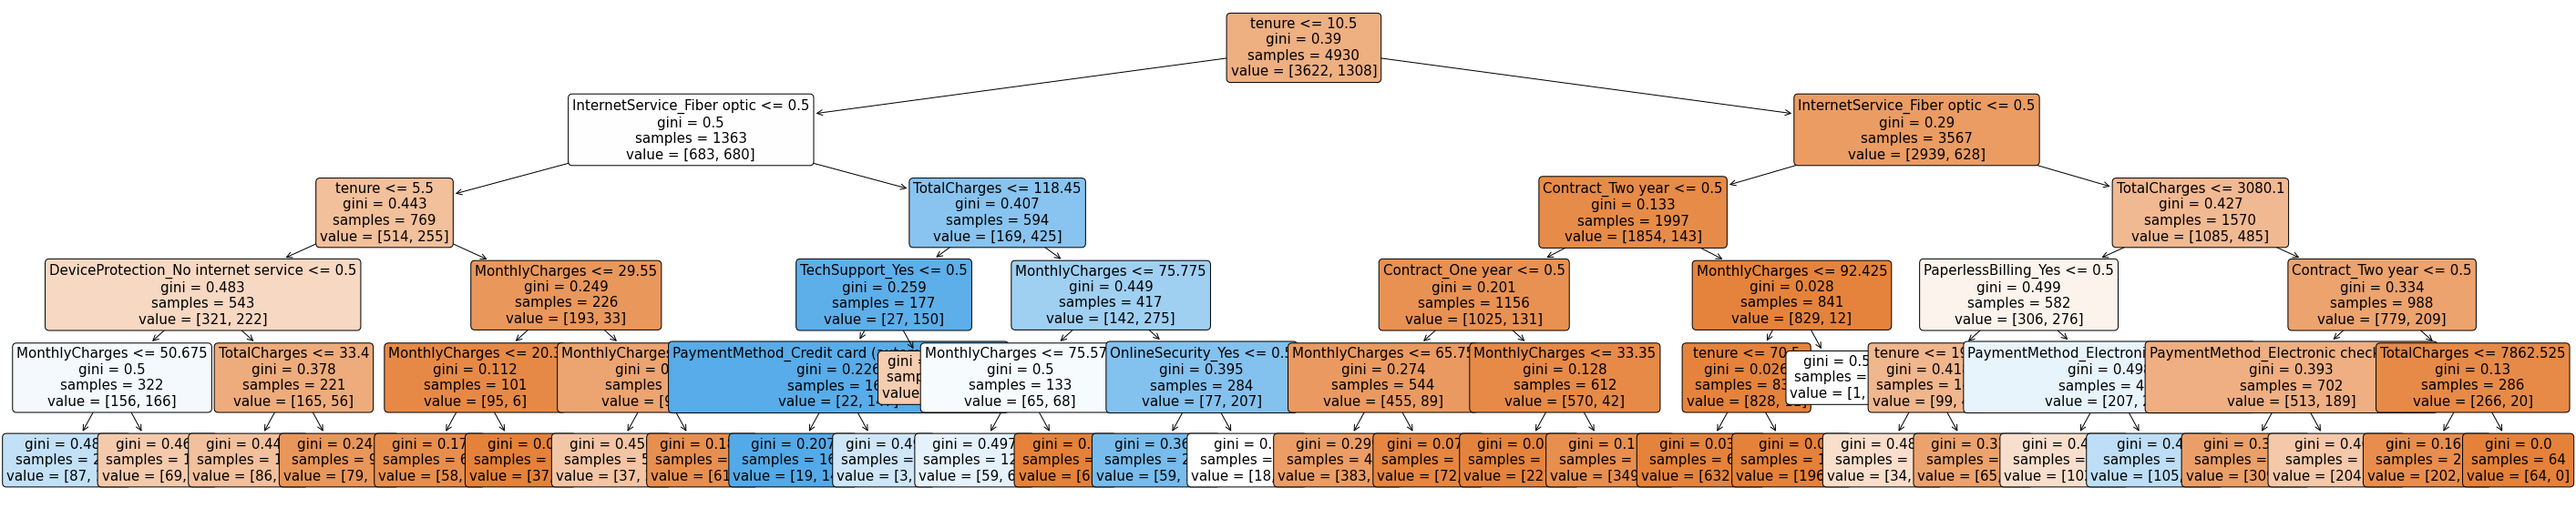

In [43]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X_all.columns)
plt.show()

In [44]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [45]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.210207
TotalCharges,0.133049
PaymentMethod_Electronic check,0.099119
InternetService_Fiber optic,0.093333
Contract_Two year,0.091679
MonthlyCharges,0.068243
OnlineSecurity_Yes,0.043324
TechSupport_Yes,0.030569
Contract_One year,0.029316
OnlineSecurity_No internet service,0.027470


In [46]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=50,
                           random_state=0)

In [47]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.263957
TotalCharges,0.181921
InternetService_Fiber optic,0.175058
MonthlyCharges,0.172719
PaymentMethod_Electronic check,0.042582
Contract_Two year,0.035507
PaperlessBilling_Yes,0.025713
Contract_One year,0.023866
OnlineSecurity_Yes,0.015227
TechSupport_Yes,0.010946


In [48]:
base_learners = [
                        ('rf', RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)),
                        ('gbm', GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50))  
                       ] 

In [49]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

In [50]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_split=50,
                                                       random_state=0)),
                               ('gbm',
                                GradientBoostingClassifier(criterion='mse',
                                                           max_depth=6,
                                                           min_samples_split=50,
                                                           random_state=0))],
                   final_estimator=LogisticRegression())

In [51]:
# Model Evaluation
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
y_pred_stacking=clf.predict(X_test)

In [52]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [53]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.79649787032655
Precision 0.6420824295010846
Recall 0.5276292335115864
f1_score 0.579256360078278


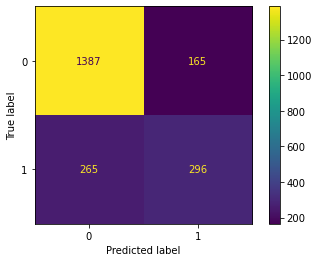

In [54]:
metrics.plot_confusion_matrix(logreg,X_test, y_test)

In [55]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.7889256980596309
Precision 0.631578947368421
Recall 0.4919786096256685
f1_score 0.5531062124248498


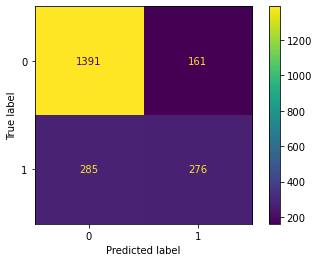

In [56]:
metrics.plot_confusion_matrix(dtree,X_test, y_test)

In [57]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.7927117841930904
Precision 0.6572890025575447
Recall 0.45811051693404636
f1_score 0.5399159663865546


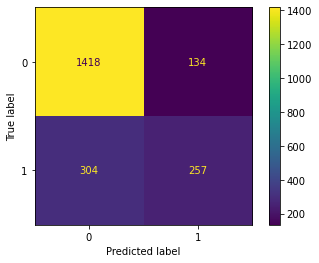

In [58]:
metrics.plot_confusion_matrix(rf,X_test, y_test)

In [59]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.7875059157595835
Precision 0.6272727272727273
Recall 0.4919786096256685
f1_score 0.5514485514485515


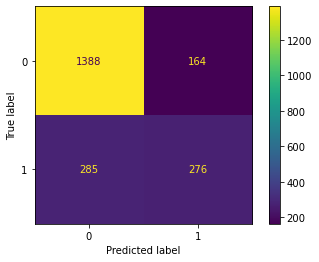

In [60]:
metrics.plot_confusion_matrix(gbm,X_test, y_test)

In [61]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_stacking))
print("Precision",metrics.precision_score(y_test,y_pred_stacking))
print("Recall",metrics.recall_score(y_test,y_pred_stacking))
print("f1_score",metrics.f1_score(y_test,y_pred_stacking))

Accuracy: 0.795551348793185
Precision 0.6517647058823529
Recall 0.49376114081996436
f1_score 0.5618661257606491


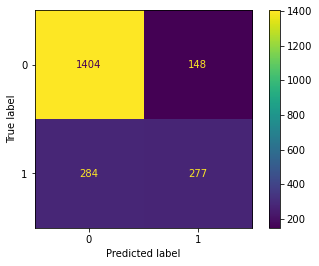

In [62]:
metrics.plot_confusion_matrix(clf,X_test, y_test)

In [64]:
y_pred_prob = logreg.predict_proba(X_all)[:, 1]
df['pred_prob_logreg']=pd.DataFrame(y_pred_prob)
df['P_Rank_logreg']=pd.qcut(df['pred_prob_logreg'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_logreg')['Churn'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_logreg')['pred_prob_logreg'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_logreg',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_logreg,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.750355,0.739520,529.0,529.0,0.283039,0.283039,176.0,176.0,0.034016,0.034016,0.2490,0.100099,0.100099,1
1,9,704,0.578125,0.593517,407.0,936.0,0.217764,0.500803,297.0,473.0,0.057402,0.091419,0.4094,0.099957,0.200057,2
2,8,704,0.450284,0.457136,317.0,1253.0,0.169609,0.670412,387.0,860.0,0.074797,0.166216,0.5042,0.099957,0.300014,3
3,7,704,0.299716,0.326427,211.0,1464.0,0.112895,0.783307,493.0,1353.0,0.095284,0.261500,0.5218,0.099957,0.399972,4
4,6,704,0.238636,0.222126,168.0,1632.0,0.089888,0.873194,536.0,1889.0,0.103595,0.365095,0.5081,0.099957,0.499929,5
5,5,705,0.154610,0.151919,109.0,1741.0,0.058320,0.931514,596.0,2485.0,0.115191,0.480286,0.4512,0.100099,0.600028,6
6,4,704,0.080966,0.096840,57.0,1798.0,0.030498,0.962012,647.0,3132.0,0.125048,0.605334,0.3567,0.099957,0.699986,7
7,3,704,0.061080,0.055169,43.0,1841.0,0.023007,0.985019,661.0,3793.0,0.127754,0.733089,0.2519,0.099957,0.799943,8
8,2,704,0.026989,0.025476,19.0,1860.0,0.010166,0.995185,685.0,4478.0,0.132393,0.865481,0.1297,0.099957,0.899901,9
9,1,705,0.012766,0.007462,9.0,1869.0,0.004815,1.000000,696.0,5174.0,0.134519,1.000000,0.0000,0.100099,1.000000,10


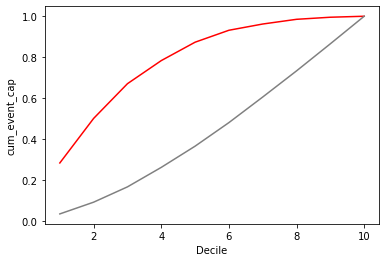

In [65]:
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_non_event_cap", data=sorted_reindexed,color='grey')

In [ ]:
# Project Conclusion :- 
# The Logistic Model has performed the best and will be used for Customer targeting with Loan offers
# Since Monthly Income and Existing EMI are the most important features for the Logistic model
# We will build a Business Value Metric based on Existing EMI/Monthly Income
# Low Values of this ratio will indicate valueable customers
# Within the High Value group, we can leverage the model to identify the best targets

In [66]:
df['Tenure_Rank']=pd.qcut(df['tenure'].rank(method='first').values,10,duplicates='drop').codes+1

In [67]:
df.groupby('Tenure_Rank')['tenure'].agg(['min','max','mean'])

,min,max,mean
Tenure_Rank,,,
1,0,2,1.099291
2,2,6,3.566761
3,6,12,8.779830
4,12,20,15.531250
5,20,29,24.153191
6,29,40,34.004261
7,40,50,45.014205
8,50,60,55.370739
9,60,69,65.001420


In [68]:
df['tenure'].mean()

32.37114865824223

In [69]:
df['Tenure_Segment']=np.where(df['Tenure_Rank']<=6,"Low Tenure","High Tenure")

In [70]:
df['MonthlyCharges_Rank']=pd.qcut(df['MonthlyCharges'].rank(method='first').values,10,duplicates='drop').codes+1

In [71]:
df.groupby('MonthlyCharges_Rank')['MonthlyCharges'].agg(['min','max','mean'])

,min,max,mean
MonthlyCharges_Rank,,,
1,18.25,20.05,19.622482
2,20.05,25.05,21.732599
3,25.05,45.85,35.514773
4,45.85,58.75,52.532244
5,58.85,70.35,65.314965
6,70.35,79.10,74.623864
7,79.10,85.50,82.140057
8,85.50,94.25,89.840199
9,94.25,102.60,98.036364


In [72]:
df['MonthlyCharges'].mean()

64.76169246059922

In [73]:
df['Monthly_Charge_Segment']=np.where(df['MonthlyCharges_Rank']<=5,"Low Charges","High Charges")

In [75]:
df['Predicted_Churn_Rank']=np.where(df['P_Rank_logreg']>=8,"Top 3","Bottom 7")

### Slice the data with respect to Top 4 and Bottom 6 Probability Ranks from the Logistic Model

In [76]:
df_top3=df.loc[df['Predicted_Churn_Rank']=='Top 3',:]

In [77]:
service_list=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'
              ,'StreamingTV','StreamingMovies','Contract','PaperlessBilling']


In [78]:
df_top3_services=df_top3[service_list]

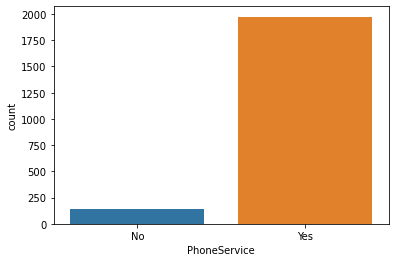

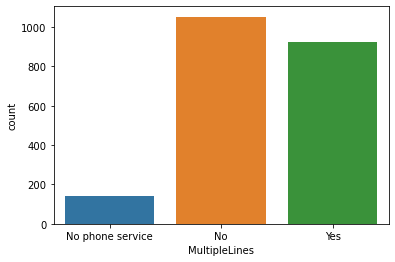

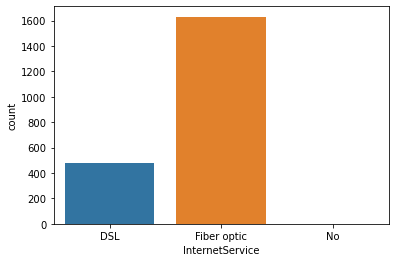

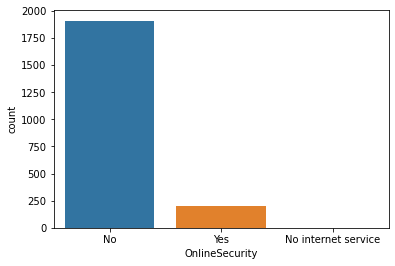

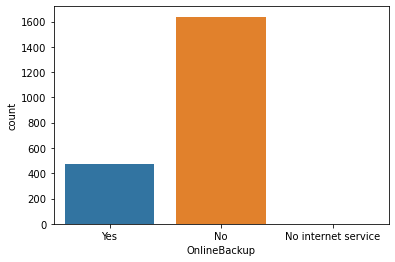

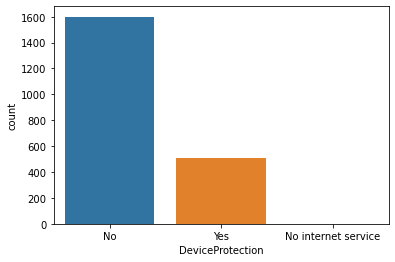

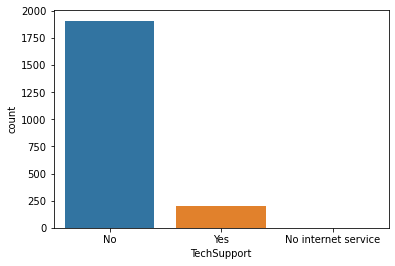

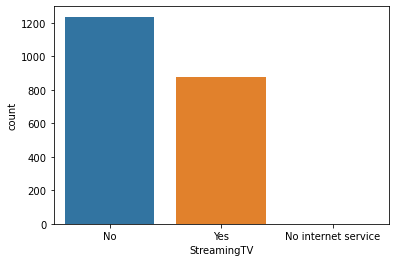

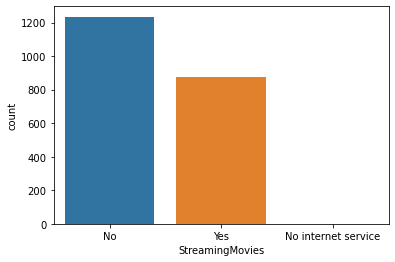

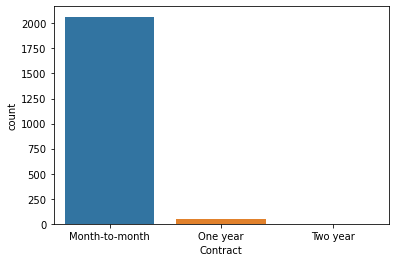

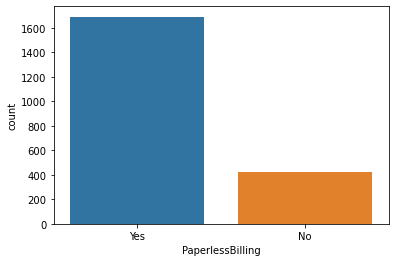

In [79]:
for col in (df_top3_services.columns):
    plt.figure()
    sns.countplot(x=col,data=df_top3_services)
plt.show()

In [80]:
pd.crosstab(index=df_top3['Monthly_Charge_Segment'], columns=df_top3['Tenure_Segment'],values=df_top3['MonthlyCharges'],aggfunc='mean')

Tenure_Segment,High Tenure,Low Tenure
Monthly_Charge_Segment,,
High Charges,97.567284,86.406568
Low Charges,NaN,51.708685


In [82]:
pd.crosstab(index=df_top3['Monthly_Charge_Segment'], columns=df_top3['Tenure_Segment'],values=df_top3['Churn'],aggfunc='count')

Tenure_Segment,High Tenure,Low Tenure
Monthly_Charge_Segment,,
High Charges,81.0,1416.0
Low Charges,NaN,616.0


In [83]:
# Recommendations
# Device Protection with Online Services
# Convert customer to DSL if they are facing challenges with Fiber Optics
# Offer discounts on Yearly contracts